### Face Similarity Using Deep Face

In [ ]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

similarity_threshold = 100
img1_path = "3.jpg"
img2_path = "4.jpg"

result = DeepFace.verify(img1_path, img2_path)

img1 = mpimg.imread(img1_path)





img2 = mpimg.imread(img2_path)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img1)
ax1.set_title('Image 1')

ax2.imshow(img2)
ax2.set_title('Image 2')

plt.show()

similarity_percentage = round(result["distance"] * 100, 2)
confidence_score=similarity_threshold - similarity_percentage
if result["verified"]:
    print(f"Both faces are similar.\n Confidence Score is {confidence_score}")
else:
    print(f"Both faces are dissimilar.\n Confidence Score is {confidence_score}")


### Face Similarity Using Face Net

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN, InceptionResnetV1, prewhiten
from torchvision import transforms
from PIL import Image

# Load FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval()

# Create MTCNN face detector
mtcnn = MTCNN(keep_all=True, min_face_size=20)

def preprocess_image(image_path):
    img = Image.open(image_path)
    img_cropped = mtcnn(img)
    
    if img_cropped is not None:
        img_cropped = transforms.functional.resize(img_cropped, (160, 160))
        img_cropped = prewhiten(img_cropped)

        if not isinstance(img_cropped, torch.Tensor):
            img_cropped_tensor = transforms.functional.to_tensor(img_cropped)
        else:
            img_cropped_tensor = img_cropped.clone()
        
        return img_cropped_tensor, img
    else:
        return None, None

def calculate_similarity(img1, img2, model):
    with torch.no_grad():
        img1_embedding = model(img1)
        img2_embedding = model(img2)

    distance = F.pairwise_distance(img1_embedding, img2_embedding)
    similarity_percentage = 100 - distance.item()

    return similarity_percentage, img1_embedding.cpu().detach(), img2_embedding.cpu().detach()

# File paths
img1_path = "3.jpg"
img2_path = "4.jpg"

# Preprocess images
img1_tensor, img1_pil = preprocess_image(img1_path)
img2_tensor, img2_pil = preprocess_image(img2_path)

if img1_tensor is not None and img2_tensor is not None:
    # Calculate similarity
    confidence_percentage, _, _ = calculate_similarity(img1_tensor, img2_tensor, model)
    similarity_threshold = 99.0

    # Visualize images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(img1_pil)
    ax1.set_title('Image 1')

    ax2.imshow(img2_pil)
    ax2.set_title('Image 2')

    plt.show()

    # Display result message
    if confidence_percentage >= similarity_threshold:
        print(f"Images are Similar.\nConfidence score: {confidence_percentage:.2f}%")
    else:
        print(f"Imaeges are Dissimilar.\nConfidence score: {confidence_percentage:.2f}%")
else:
    print("No face detected in one or both of the images.")


### Face Similarity grp photo 

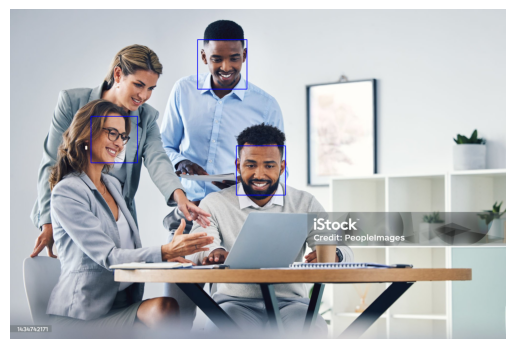

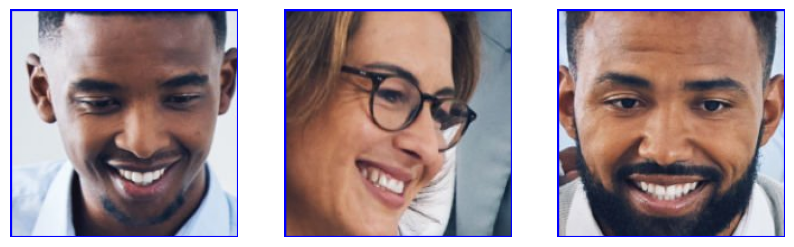

In [7]:
import cv2
import matplotlib.pyplot as plt

def detect_and_crop_faces(image_path):
    # Load the cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Read the input image
    image = cv2.imread(image_path)
    
    # Convert into grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    cropped_faces = []
    # Draw rectangle around the faces and crop them
    for (x, y, w, h) in faces:
        # Crop the face region from the image
        cropped_face = image[y:y+h, x:x+w]
        cropped_faces.append(cropped_face)
        
        # Draw a rectangle around the faces
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Display the output
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # Display cropped faces
    fig = plt.figure(figsize=(10, 5))
    columns = len(cropped_faces)
    for i, face in enumerate(cropped_faces):
        fig.add_subplot(1, columns, i+1)
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()
    
    return cropped_faces

# Example usage:
image_path = 'aa.jpg'
cropped_faces = detect_and_crop_faces(image_path)


In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from facenet_pytorch import InceptionResnetV1, prewhiten

# Load FaceNet model
face_recognition_model = InceptionResnetV1(pretrained='vggface2').eval()

def detect_and_crop_faces(image_path):
    # Load the cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Read the input image
    image = cv2.imread(image_path)
    
    # Convert into grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    cropped_faces = []
    face_embeddings = []
    # Draw rectangle around the faces and crop them
    for (x, y, w, h) in faces:
        # Crop the face region from the image
        cropped_face = image[y:y+h, x:x+w]
        cropped_faces.append(cropped_face)
        
        # Preprocess the cropped face for face recognition model
        preprocessed_face = prewhiten(cropped_face)
        preprocessed_face_tensor = preprocessed_face.unsqueeze(0)
        
        # Calculate face embeddings
        with torch.no_grad():
            face_embedding = face_recognition_model(preprocessed_face_tensor)
        
        face_embeddings.append(face_embedding)
        
        # Draw a rectangle around the faces
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Display the output
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # Display cropped faces
    fig = plt.figure(figsize=(10, 5))
    columns = len(cropped_faces)
    for i, face in enumerate(cropped_faces):
        fig.add_subplot(1, columns, i+1)
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()
    
    # Compute similarity scores among cropped faces
    num_faces = len(face_embeddings)
    similarity_scores = np.zeros((num_faces, num_faces))
    for i in range(num_faces):
        for j in range(num_faces):
            if i != j:
                # Compute cosine similarity between embeddings
                similarity_score = np.dot(face_embeddings[i].numpy().flatten(), face_embeddings[j].numpy().flatten()) / (
                    np.linalg.norm(face_embeddings[i].numpy()) * np.linalg.norm(face_embeddings[j].numpy())
                )
                similarity_scores[i, j] = similarity_score
    
    return cropped_faces, similarity_scores

# Example usage:
image_path = 'ransrk2.jpg'
cropped_faces, similarity_scores = detect_and_crop_faces(image_path)
print("Similarity scores among cropped faces:")
print(similarity_scores)


AttributeError: 'numpy.float64' object has no attribute 'clamp'